In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
NAVI = get_pricing('NAVI',start_date='2014-06-15',
                    end_date = '2019-08-10',
                    frequency= 'daily')
SLM = get_pricing('SLM',start_date='2014-06-15',
                    end_date = '2019-08-10',
                    frequency= 'daily')

In [5]:
NAVI.head()

,open_price,high,low,close_price,volume,price
2014-06-16 00:00:00+00:00,13.284,13.468,13.237,13.372,604551.0,13.372
2014-06-17 00:00:00+00:00,13.308,13.524,13.268,13.428,1099841.0,13.428
2014-06-18 00:00:00+00:00,13.364,13.651,13.308,13.603,2111243.0,13.603
2014-06-19 00:00:00+00:00,13.563,13.811,13.336,13.707,3346480.0,13.707
2014-06-20 00:00:00+00:00,13.779,13.978,13.675,13.922,2476222.0,13.922


In [6]:
navi_pct5=NAVI['close_price'].pct_change(periods=5)
slm_pct5=SLM['close_price'].pct_change(periods=5)
sl=(navi_pct5/slm_pct5)
dl=sl.replace([np.inf, -np.inf], np.nan)
dl.dropna(inplace=True)
dl.mean()



0.5978104472187236

In [7]:
(NAVI['close_price'].pct_change(periods=30) / SLM['close_price'].pct_change(periods=30)).head()

2014-06-16 00:00:00+00:00   NaN
2014-06-17 00:00:00+00:00   NaN
2014-06-18 00:00:00+00:00   NaN
2014-06-19 00:00:00+00:00   NaN
2014-06-20 00:00:00+00:00   NaN
Freq: C, Name: close_price, dtype: float64

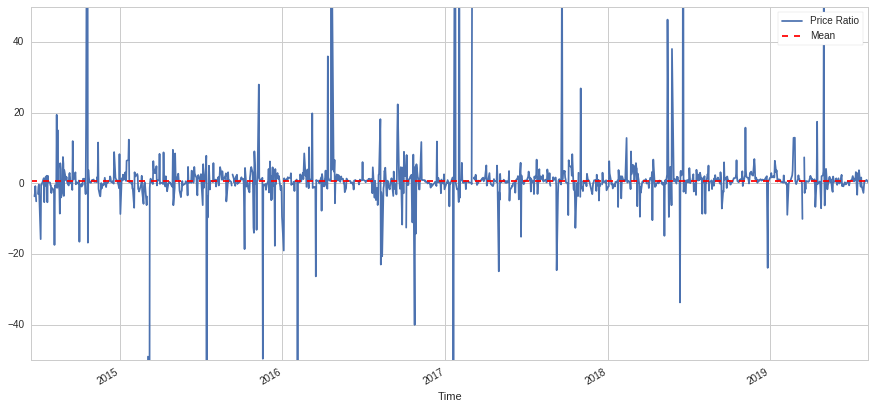

In [8]:
sl.plot(figsize=(15,7))
plt.axhline(dl.mean(), color='red', linestyle='--') 
plt.xlabel('Time')
plt.legend(['Price Ratio', 'Mean'])
plt.ylim(-50,50)
plt.show()

In [17]:
(SLM['close_price'].pct_change(periods=5)/NAVI['close_price'].pct_change(periods=5)).mean()

nan

In [29]:
# compute the p-value of the cointegration test
# will inform us as to whether the ratio between the 2 timeseries is stationary
# around its mean
score, pvalue, _ = coint(X,Y)

In [23]:
SLM['close_price'].pct_change(periods=5).mean()

0.0009252834179592866

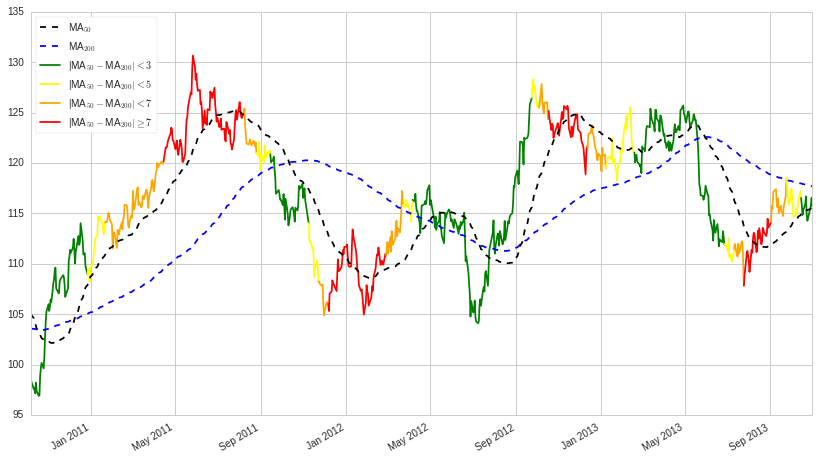

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Simulate data
np.random.seed(1234)
df = pd.DataFrame(
    {'px_last': 100 + np.random.randn(1000).cumsum()},
    index=pd.date_range('2010-01-01', periods=1000, freq='B'),
)
df['50dma'] = df['px_last'].rolling(window=50, center=False).mean()
df['200dma'] = df['px_last'].rolling(window=200, center=False).mean()

## Apply labels
df['label'] = 'out of bounds'
df.loc[abs(df['50dma'] - df['200dma']) >= 7, 'label'] = '|50dma - 200dma| >= 7'
df.loc[abs(df['50dma'] - df['200dma']) < 7, 'label'] = '|50dma - 200dma| < 7'
df.loc[abs(df['50dma'] - df['200dma']) < 5, 'label'] = '|50dma - 200dma| < 5'
df.loc[abs(df['50dma'] - df['200dma']) < 3, 'label'] = '|50dma - 200dma| < 3'
df = df[df['label'] != 'out of bounds']

## Convert labels to colors
label2color = {
    '|50dma - 200dma| < 3': 'green',
    '|50dma - 200dma| < 5': 'yellow',
    '|50dma - 200dma| < 7': 'orange',
    '|50dma - 200dma| >= 7': 'red',
}
df['color'] = df['label'].apply(lambda label: label2color[label])

# Create plot
fig, ax = plt.subplots()

def gen_repeating(s):
    """Generator: groups repeated elements in an iterable
    E.g.
        'abbccc' -> [('a', 0, 0), ('b', 1, 2), ('c', 3, 5)]
    """
    i = 0
    while i < len(s):
        j = i
        while j < len(s) and s[j] == s[i]:
            j += 1
        yield (s[i], i, j-1)
        i = j

## Add px_last lines
for color, start, end in gen_repeating(df['color']):
    if start > 0: # make sure lines connect
        start -= 1
    idx = df.index[start:end+1]
    df.loc[idx, 'px_last'].plot(ax=ax, color=color, label='')

## Add 50dma and 200dma lines
df['50dma'].plot(ax=ax, color='k', ls='--', label='MA$_{50}$')
df['200dma'].plot(ax=ax, color='b', ls='--', label='MA$_{200}$')

## Get artists and labels for legend and chose which ones to display
handles, labels = ax.get_legend_handles_labels()

## Create custom artists
g_line = plt.Line2D((0,1),(0,0), color='green')
y_line = plt.Line2D((0,1),(0,0), color='yellow')
o_line = plt.Line2D((0,1),(0,0), color='orange')
r_line = plt.Line2D((0,1),(0,0), color='red')

## Create legend from custom artist/label lists
ax.legend(
    handles + [g_line, y_line, o_line, r_line],
    labels + [
        '|MA$_{50} - $MA$_{200}| < 3$',
        '|MA$_{50} - $MA$_{200}| < 5$',
        '|MA$_{50} - $MA$_{200}| < 7$',
        '|MA$_{50} - $MA$_{200}| \geq 7$',
    ],
    loc='best',
)

# Display plot
plt.show()

In [23]:
def initialize(context):
    context.techy = [sid(24), sid(1900), sid(16841)]
    
def handel_data(context,data):
    tech_close = data.current(context.techy, 'close')
    print(tech_close)
                       